<a href="https://colab.research.google.com/github/avellar1975/DataScience/blob/main/jupyter_notebooks/Evandro_Ferreira_de_Avellar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://raw.githubusercontent.com/avellar1975/DataScience/main/img/header_projeto.png' width=900>

Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Resumo:

<p>Analisar os impactos do COVID-19 no país sem olhar diretamente para os dados de contaminados e óbitos pode ser uma forma imparcial de verificar o quanto ela está afetando nossa sociedade.</p>
<p>O objetivo deste estudo é analisar o comportamento mensal da quantidade de óbitos dos últimos 10 anos e descobrir se o COVID-19 afetou a quantidade de óbitos mensais comparado com os anos anteriores.</p>
<p>Podemos não chegar a essa conclusão se por hipótese os óbitos por COVID-19 substituiu outras causas de morte, por exemplo: será que houve redução de mortes por outras doenças contagiosas prevenidas pelo isolamento social e utilização de máscaras? Será que houve uma redução de acidentes de trânsito por conta do isolamento nos grandes centros urbanos.</p>
<p>Por outro lado, a análise poderá demonstrar que somado ao número de óbitos por COVID-19 houve uma aumento provocado indiretamente pela pandemia, com um possível crescimento de óbitos por conta da complicações de outras doenças causadas por um colapso do sistema de saúde, neste caso haverá um crescimento anormal na curva dos óbitos mensais.</p>
<p>Acredito que o resultado poderá trazer uma evidência científica, que ficará acima das convicções políticas que infelizmente se misturam nessa grande crise de saúde.</p>

## Análise dos dados:

### Preparando a base do estudo

<p>Através do Shell no Linux o arquivo original foi reduzido para os últimos 10 anos.</p>
<img src='https://raw.githubusercontent.com/avellar1975/DataScience/main/img/bash.png' width=200>

```
$ head -1 obitos-registro-civil.csv > obitos_2010_2020.csv
$ tail -3451 obitos-registro-civil.csv >> obitos_2010_2020.csv
```

### Importando bibliotecas que serão utilizadas no estudo

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker

### Carregando nosso dataset

In [14]:
obitos = pd.read_csv('https://raw.githubusercontent.com/avellar1975/DataScience/main/dados/obitos_2010_2020.csv')
obitos.head()

,year,month,state,deaths
0,2010,1,AC,79
1,2010,1,AL,557
2,2010,1,AP,149
3,2010,1,BA,666
4,2010,1,CE,146


> Será preciso criar uma nova coluna 'Ano/mês' para facilitar o agrupamento de óbitos por mês.

In [15]:
for index, row in obitos.iterrows():
    if row['month'] < 10:
        row['month'] = '0' + str(row['month'])
    obitos.loc[index,'Ano/mês'] = str(row['year']) + '/' + str(row['month'])

obitos.head()

,year,month,state,deaths,Ano/mês
0,2010,1,AC,79,2010/01
1,2010,1,AL,557,2010/01
2,2010,1,AP,149,2010/01
3,2010,1,BA,666,2010/01
4,2010,1,CE,146,2010/01


> Inicialmente vamos realizar a análise por Ano/mês independente da UF

In [16]:
obitos_agrupados = obitos[['Ano/mês', 'deaths']].groupby('Ano/mês').sum()
obitos_agrupados.tail()

,deaths
Ano/mês,
2020/04,112863
2020/05,130470
2020/06,132361
2020/07,136728
2020/08,126535


### Gráfico dos dados gerados

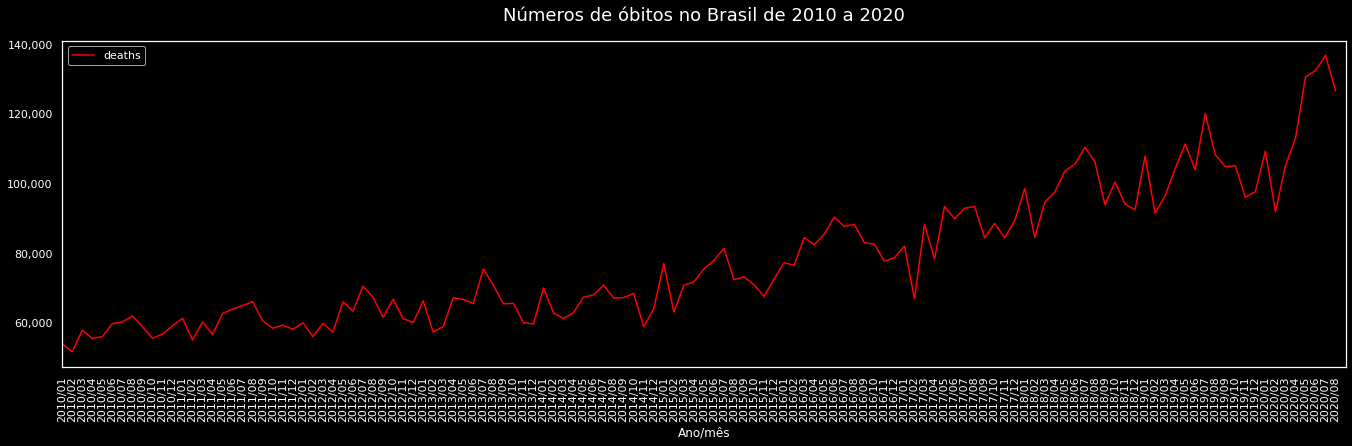

In [17]:
# style
plt.style.use('dark_background')
 
# create a color palette
palette = plt.get_cmap('hsv')
 
ax = obitos_agrupados.plot(figsize=(23,6), colormap=palette, grid=False)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.xaxis
ax.set_title('Números de óbitos no Brasil de 2010 a 2020', fontsize=18, pad=20, color='white')

plt.xticks(rotation=90)
plt.xlim(0, 128)
ax.set_xticks(range(0,128))
ax.set_xticklabels(obitos_agrupados.T.columns)


plt.show()


### Reduzindo a base para 5 anos

A redução foi realizada para faciliar a observação dos meses

In [18]:
obitos_5_anos = obitos_agrupados[60:]
obitos_5_anos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 2015/01 to 2020/08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   deaths  68 non-null     int64
dtypes: int64(1)
memory usage: 1.1+ KB


### Gráfico dos últimos 5 anos

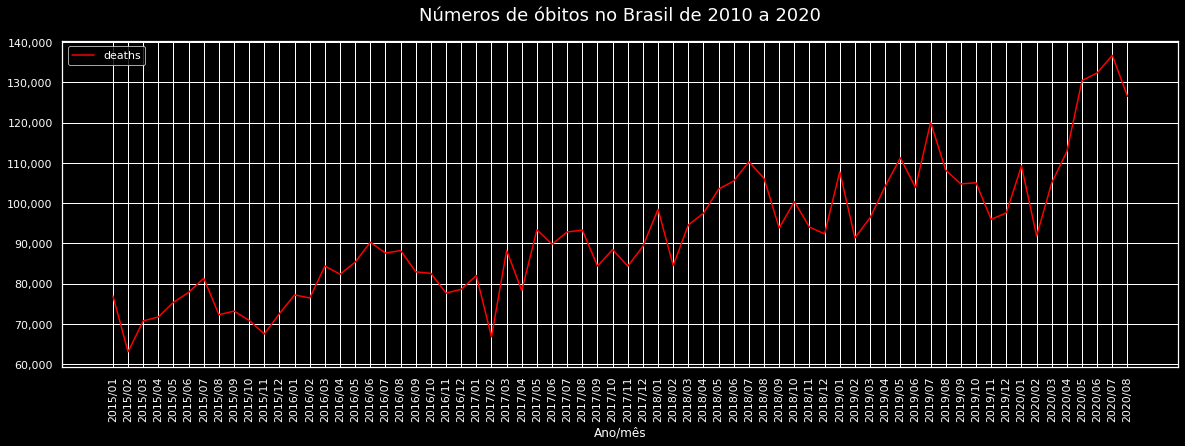

In [19]:
# style
plt.style.use('dark_background')
 
# create a color palette
palette = plt.get_cmap('hsv')
 
ax = obitos_5_anos.plot(figsize=(20,6), colormap=palette, grid=True)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.xaxis
ax.set_title('Números de óbitos no Brasil de 2010 a 2020', fontsize=18, pad=20, color='white')

plt.xticks(rotation=90)
# plt.xlim(0, 68)
ax.set_xticks(range(0,68))
ax.set_xticklabels(obitos_5_anos.T.columns)


plt.show()

In [24]:
obitos_5_anos.T[['2019/02', '2019/07', '2020/02', '2020/07']]

Ano/mês,2019/02,2019/07,2020/02,2020/07
deaths,91364,120077,91860,136728


In [31]:
fev = (91860 / 91364) * 100 - 100
jul = (136728 / 120077) * 100 - 100

print(f'Fevereiro variou {fev:.2f}')
print(f'Julho variou {jul:.2f}')

Fevereiro variou 0.54
Julho variou 13.87


### Conclusões até aqui

* Importante observar que o valor máximo de óbitos no ano quase sempre ocorre em julho e o mínimo em fevereiro.

* Provavelmente o pico de óbitos em julho se justifique pelo inverno e doenças respiratórias.

* Uma outra observação é que a quantidade de óbitos de Fevereiro de 2019 foi bem próxima de Fevereiro de 2020 (acréscimo de 0,54%) enquanto o mês de julho cresceu 13,87% em relação ao ano anterior.

* Há uma tendência de aumento de óbitos a cada ano mas a diferença de crescimento entre os meses de fevereiro e julho são relevantes.



### Geração de gráfico consideranto os meses de fevereiro e julho de cada ano

In [ ]:
obitos_julho = obitos.query('month == 2 or month == 7 ')

In [ ]:
obitos_agrupados_julho = obitos_julho[['Ano/mês', 'deaths']].groupby('Ano/mês').sum()
obitos_agrupados_julho.tail()

,deaths
Ano/mês,
2018/07,110316
2019/02,91364
2019/07,120077
2020/02,91860
2020/07,136728


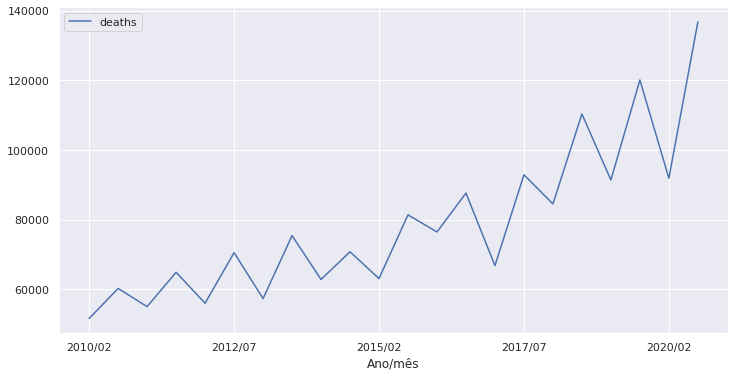

In [ ]:
obitos_agrupados_julho.plot(figsize=(12,6))

> É possível observar que o crescimento entre fevereiro e julho ocorreu de forma fora do padrão dos outros anos.

### Avaliação de alguns dados do dataset do COVID

<p>Através do Shell no Linux o arquivo original foi reduzido para o último dia (04-11-2020) que apresentou os dados acumulados das 27 UFs.</p>
<img src='https://raw.githubusercontent.com/avellar1975/DataScience/main/img/bash.png' width=200>



```
$ head -1 COVID19-BRASILIO-06-11-2020.csv > covid_2020_uf.csv
$ cat COVID19-BRASILIO-06-11-2020.csv | grep 2020-11-04 | grep state >> covid_2020_uf.csv 
```

In [33]:
dados_covid = pd.read_csv('https://raw.githubusercontent.com/avellar1975/DataScience/main/dados/covid_2020_uf.csv')
dados_covid.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-04,AC,NaN,state,31218,696,233,False,881935,894470,12,3490.11146,0.0223
1,2020-11-04,AM,NaN,state,163399,4588,233,False,4144597,4207714,13,3883.32002,0.0281
2,2020-11-04,AL,NaN,state,91142,2254,239,False,3337357,3351543,27,2719.40417,0.0247
3,2020-11-04,DF,NaN,state,214655,3719,242,False,3015268,3055149,53,7026.00757,0.0173
4,2020-11-04,CE,NaN,state,276012,9385,234,False,9132078,9187103,23,3004.34207,0.0340
